<a href="https://colab.research.google.com/github/daniloaleixo/gan-abstract-art/blob/main/GAN_Abtract_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15960461390002702343, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11625274283045426659
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!mkdir data

In [ ]:
!cp /content/gdrive/My\ Drive/Data/resized.zip data/resized.zip

In [ ]:
!unzip data/resized.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized/lyubov-popova_18_cropped.jpg  
  inflating: resized/lyubov-popova_2_cropped.jpg  
  inflating: resized/lyubov-popova_2_cropped_05.jpg  
  inflating: resized/lyubov-popova_3_01.jpg  
  inflating: resized/lyubov-popova_4_cropped_03.jpg  
  inflating: resized/lyubov-popova_5_05.jpg  
  inflating: resized/lyubov-popova_5_cropped_05.jpg  
  inflating: resized/lyubov-popova_6.jpg  
  inflating: resized/lyubov-popova_8.jpg  
  inflating: resized/lyubov-popova_9_05.jpg  
  inflating: resized/m-h-maxy_0_cropped_02.jpg  
  inflating: resized/man-ray_1_03.jpg  
  inflating: resized/man-ray_1_cropped_00.jpg  
  inflating: resized/man-ray_1_cropped_05.jpg  
  inflating: resized/marcel-duchamp_0_cropped_04.jpg  
  inflating: resized/marcel-duchamp_0_cropped_05.jpg  
  inflating: resized/marcel-duchamp_1_cropped_04.jpg  
  inflating: resized/marcel-janco_0_cropped_03.jpg  
  inflating: resized/marsden-hartley_0_02.jpg  
  inflati

# Imports

In [ ]:
import numpy as np 
import pandas as pd 
import os

from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import glob

from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

# Preparing data

In [ ]:
path_arts = []
train_path_arts = "./resized/"
for path in os.listdir(train_path_arts):
    if '.jpg' in path and '_cropped_' in path:
        path_arts.append(os.path.join(train_path_arts, path))    

In [ ]:
new_path=path_arts
print(new_path[0:1])

['./resized/alexander-rodchenko_0_cropped_04.jpg']


In [ ]:
# Test environment
new_path=new_path[0:20]

In [ ]:
images = [np.array((Image.open(path)).resize((128,128))) for path in tqdm(new_path)] 
print('np array created')

for i in tqdm(range(len(images))):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
print('normalized')
images = np.array(images) 

100%|██████████| 20/20 [00:00<00:00, 4368.38it/s]

np array created
normalized


In [ ]:
train_data=images
len(train_data)

20

<Figure size 720x720 with 0 Axes>

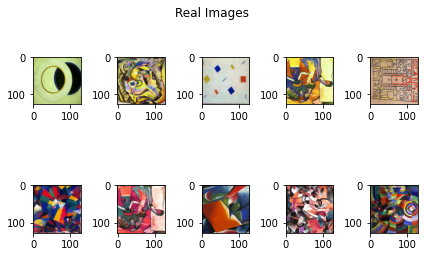

In [ ]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=0

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(train_data[idx].reshape(128,128,3))
            #ax[i,j].set_title("Real Image")
            
            idx+=1
            
plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data 

# Generator

In [ ]:
noise_shape = 100

In [ ]:
generator=Sequential()
generator.add(Dense(4*4*512,input_shape=[noise_shape])) 
generator.add(Reshape([4,4,512]))
generator.add(Conv2DTranspose(2048, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1024, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid'))

## Load weights

In [ ]:
gen_weights_loadfile = 'generator_abstract_art_e110.h5'
# gen_weights_loadfile = False
if gen_weights_loadfile:
    print('loading weights ', gen_weights_loadfile)
    !cp /content/gdrive/My\ Drive/Data/$gen_weights_loadfile data/$gen_weights_loadfile
    generator.load_weights('data/' + gen_weights_loadfile)

loading weights  generator_abstract_art_e110.h5


In [ ]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 2048)        16779264  
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 8, 8, 2048)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 8, 2048)        8192      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 16, 16, 1024)      33555456  
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 1024)     

# Discriminator

In [ ]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[128,128, 3]))
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same")) 
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
disc_weights_loadfile = 'discriminator_abstract_art_e110.h5'
# disc_weights_loadfile = False
if disc_weights_loadfile:
    print('loading weights ', disc_weights_loadfile)
    !cp /content/gdrive/My\ Drive/Data/$disc_weights_loadfile data/$disc_weights_loadfile
    discriminator.load_weights('data/' + disc_weights_loadfile)

loading weights  discriminator_abstract_art_e110.h5


In [ ]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 128)      

# GAN

In [ ]:
GAN = Sequential([generator,discriminator])

In [ ]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 128, 128, 3)       61676291  
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 707297    
Total params: 62,383,588
Trainable params: 61,668,611
Non-trainable params: 714,977
_________________________________________________________________


# Training

In [ ]:
D_loss=[] 
G_loss=[]

In [ ]:
import time

epochs = 500
batch_size = 64
current_time = time.time()
epoch_offset = 110
save_every_n_epochs = 10

with tf.device('/gpu:0'):
 for e in tqdm(range(epochs - epoch_offset)):
    start_time = time.time()
    print('epoch ', e, ' elapsed time ', start_time - current_time)
    for i in range(batch_size):
        # I reccomend you to look "Training Diagram" (at the top) 
        noise = np.random.normal(0,1, [batch_size,100])
        
        generated_images = generator.predict(noise)
       
        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)] #get samples from real data
        
        x = np.concatenate([image_batch, generated_images])
        
        y_dis = np.zeros(batch_size*2) 
        y_dis[:batch_size] = 1 # we labeled real images as 1 and generated images as 0
        
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x,y_dis) # we are training discriminator (train_on_batch)
        
        noise = np.random.normal(0,1,[batch_size,100])
        
        y_gen = np.ones(batch_size) # our generator says "these images are real"
        
        discriminator.trainable = False
        
        g_loss = GAN.train_on_batch(noise, y_gen) #train_on_batch
        
        D_loss.append(d_loss)
        G_loss.append(g_loss)

    # Save
    if e % save_every_n_epochs == 0:
        gen_weights_filename = "generator_abstract_art_e" + str(epoch_offset + e) + ".h5" 
        disc_weights_filename = "discriminator_abstract_art_e" + str(epoch_offset + e) + ".h5" 
        generator.save(gen_weights_filename)
        discriminator.save(disc_weights_filename)
        !cp $gen_weights_filename /content/gdrive/My\ Drive/Data/$gen_weights_filename
        !cp $disc_weights_filename /content/gdrive/My\ Drive/Data/$disc_weights_filename
    
    # printing results
    if e%10 == 0:
        # print("Time since start: {}".format(np.round(start_time - current_time)))
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)

        fig, axs = plt.subplots(2, 3, figsize=(13, 8), sharey=True)
        axs[0,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,1].axis("off")
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,2].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128, 128,3)
        axs[1,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,1].axis("off")
        
        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,2].axis("off")
        
        fig.suptitle("{} Epochs Result".format(str(e)),fontsize=15)
        plt.show()   

In [ ]:
from keras import models
generator.save("generator_abstract_art.h5") # you can donwload this model from output part of this kernel.
discriminator.save("discriminator_abstract_art.h5") # you can donwload this model from output part of this kernel.

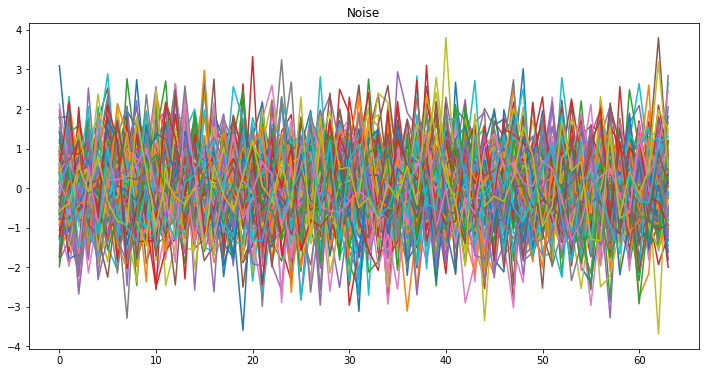

In [ ]:
fig = plt.figure(figsize = (12,6))
plt.plot(noise)
plt.title("Noise")
plt.show()

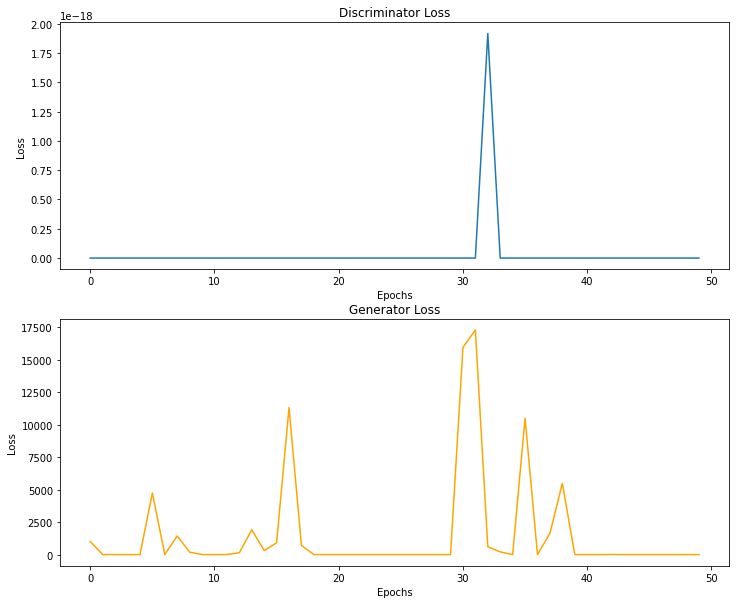

In [ ]:
index = 0
D_loss2 = []
G_loss2 = []

for i in range(1,epochs+1):
    D_loss2.append(D_loss[index])
    G_loss2.append(G_loss[index])
    index += batch_size

fig, axs = plt.subplots(2, 1, figsize = (12,10))

axs[0].plot(D_loss2, label = "Discriminator Loss")
axs[1].plot(G_loss2, label = "Generator Loss", color = "orange")

axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")

axs[0].set_ylabel("Loss")
axs[1].set_ylabel("Loss")

axs[0].set_title("Discriminator Loss")
axs[1].set_title("Generator Loss")
plt.show()

# Results

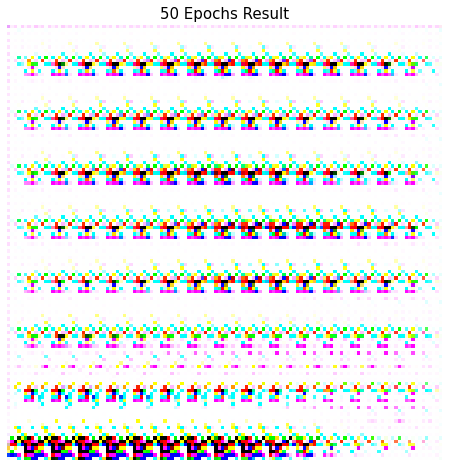

In [ ]:
fig = plt.figure(figsize = (12,8))
noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
generated_images = generator.predict(noise)
generated_images = generated_images 
plt.imshow(generated_images[66].reshape(128,128,3))
plt.axis("off")
plt.title("{} Epochs Result".format(str(e+1)),fontsize=15)
plt.show()

In [ ]:
!cp generator_abstract_art.h5 /content/gdrive/My\ Drive/Data/generator_abstract_art.h5
!cp discriminator_abstract_art.h5 /content/gdrive/My\ Drive/Data/discriminator_abstract_art.h5